<a href="https://colab.research.google.com/github/tvml/ml2122/blob/master/codici/linregr_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modello bayesiano gerarchico per regressione

In [59]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

In [62]:
size = 200
true_intercept = 1
true_slope = 2
true_var = .5
x = np.linspace(0,1,size)
true_regression_line = true_intercept+true_slope*x
y = true_regression_line + np.random.normal(scale=true_var, size= size)
data = dict(x=x, y=y)

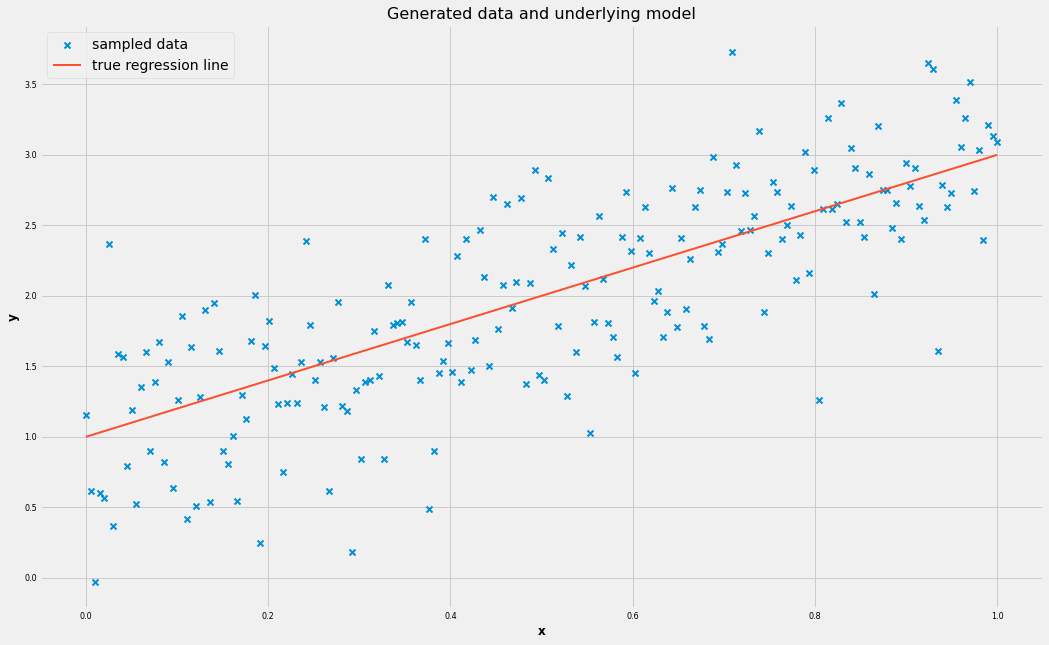

In [63]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)
ax.scatter(x, y, marker='x', color=colors[0],label='sampled data')
ax.plot(x, true_regression_line, color=colors[1], label='true regression line', lw=2.)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Generated data and underlying model', fontsize=16)
plt.legend(loc=0, fontsize=14)
plt.show()

![Diagramma modello regressione lineare gaussiana.](assets/lin_regr.png)

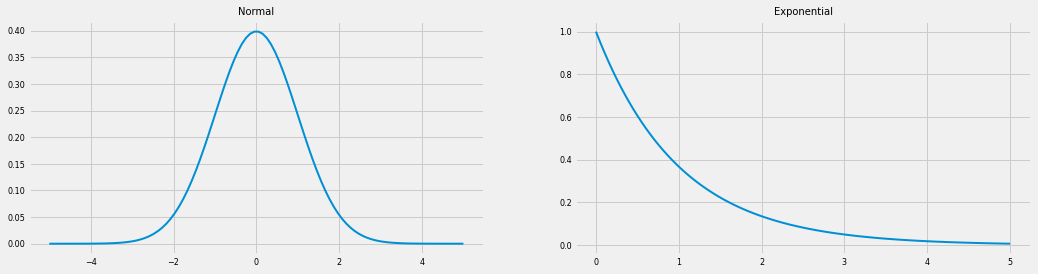

In [57]:
fig = plt.figure(figsize=(16, 4))
dist = stats.norm()
ax = fig.add_subplot(121)
x = np.linspace(-5,5, 100)
ax.plot(x, dist.pdf(x))
plt.title('Normal')
ax = fig.add_subplot(122)
dist1 = stats.expon()
x_ = np.linspace(0,5, 100)
ax.plot(x_, dist1.pdf(x_))
plt.title('Exponential')
plt.show()

In [58]:
with pm.Model() as model:
    # a priori
    sigma = pm.Exponential('sigma', lam=10)
    theta_0 = pm.Normal('theta_0', mu=0, sd=20)
    theta_1 = pm.Normal('theta_1', mu=0, sd=20)
    # likelihood
    likelihood = pm.Normal('y', mu=theta_0+theta_1*x, sd=sigma, observed=y)
    trace = pm.sample(3000)

ValueError: Input dimension mis-match. (input[0].shape[0] = 200, input[1].shape[0] = 100)

<Figure size 1152x576 with 0 Axes>

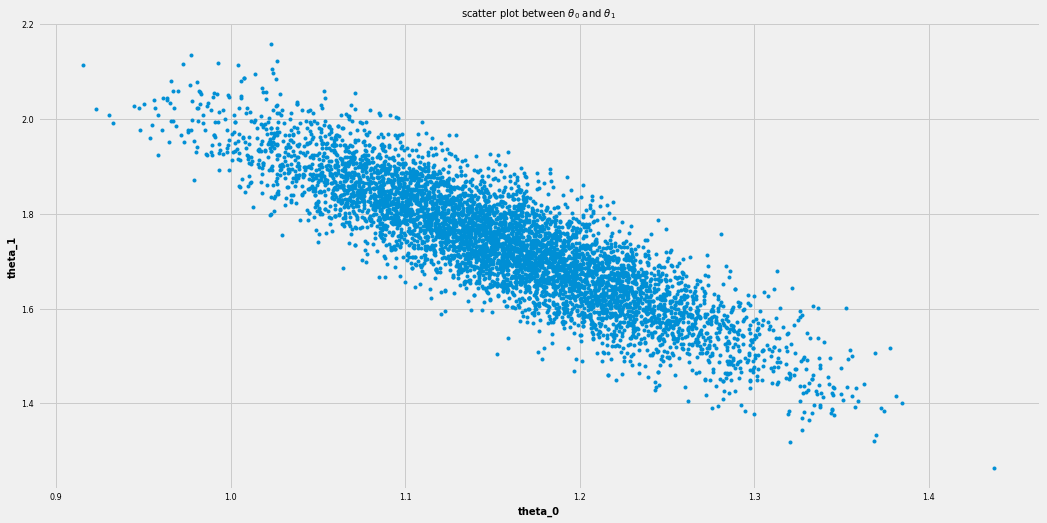

In [29]:
plt.figure(figsize=(16,8))
pm.pairplot(trace,
           var_names=['theta_0','theta_1'],
           divergences=True)
plt.title(r'scatter plot between $\theta_0$ and $\theta_1$')
plt.show()

<Figure size 1152x576 with 0 Axes>

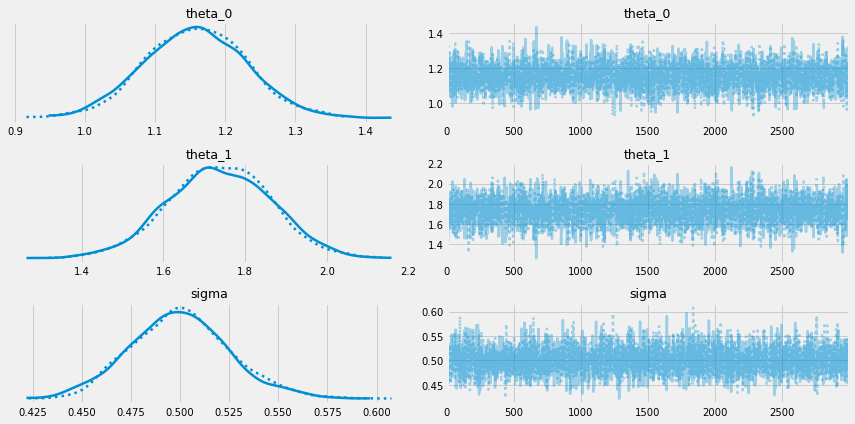

In [12]:
plt.figure(figsize=(16,8))
pm.traceplot(trace, lines={'theta_0':true_intercept, 'theta_1':true_slope})
plt.tight_layout()
plt.show()

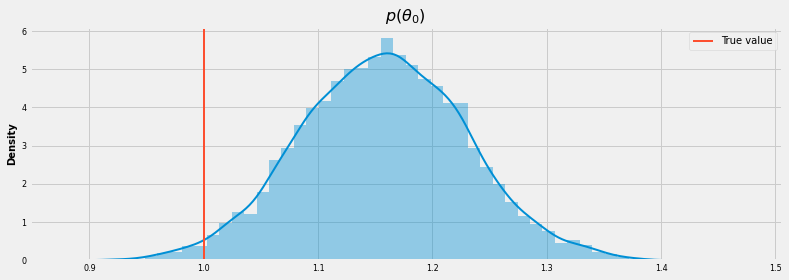

In [13]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace['theta_0'], color=colors[0])
ax.axvline(true_intercept, color=colors[1], label='True value')
plt.title(r'$p(\theta_0)$', fontsize=16)
plt.legend()
plt.show()

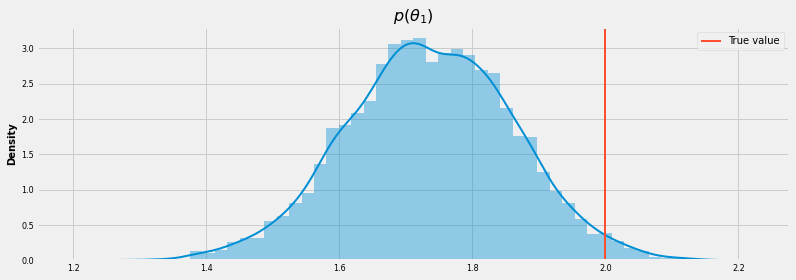

In [14]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace['theta_1'], color=colors[0])
ax.axvline(true_slope, color=colors[1], label='True value')
plt.title(r'$p(\theta_1)$', fontsize=16)
plt.legend()
plt.show()

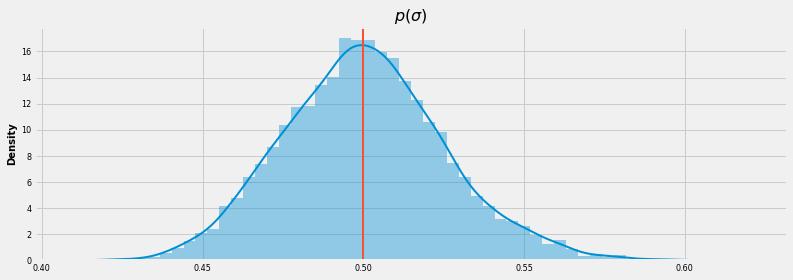

In [19]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace['sigma'], color=colors[0])
ax.axvline(true_var, color=colors[1], label='True value')
plt.title(r'$p(\sigma)$', fontsize=16)
plt.show()

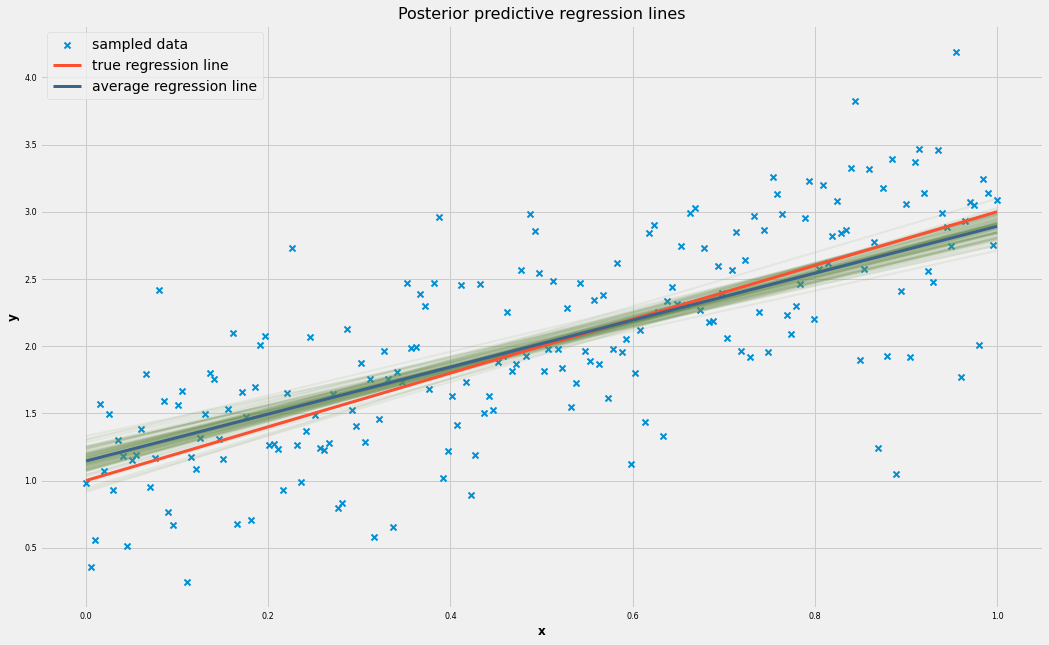

In [20]:
plt.figure(figsize=(16, 10))
plt.scatter(x, y, marker='x', color=colors[0],label='sampled data')
t0 = []
t1 = []
for i in range(100):
    ndx = np.random.randint(0, len(trace))
    theta_0, theta_1 = trace[ndx]['theta_0'], trace[ndx]['theta_1']
    t0.append(theta_0)
    t1.append(theta_1)
    p = theta_0+theta_1*x 
    plt.plot(x, p, c=colors[3], alpha=.1)
plt.plot(x, true_regression_line, color=colors[1], label='true regression line', lw=3.)
theta_0_mean = np.array(t0).mean()
theta_1_mean = np.array(t1).mean()
plt.plot(x, theta_0_mean+theta_1_mean*x, color=colors[8], label='average regression line', lw=3.)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Posterior predictive regression lines', fontsize=16)
plt.legend(loc=0, fontsize=14)
plt.show()

In [ ]:
p = theta_0_mean+theta_1_mean*x

In [ ]:
e = [(y[i]-p[i])**2 for i in range(len(p))]
err = np.mean(e)
print(err)

![Diagramma modello regressione lineare t-Student.](assets/lin_regr_1.png)

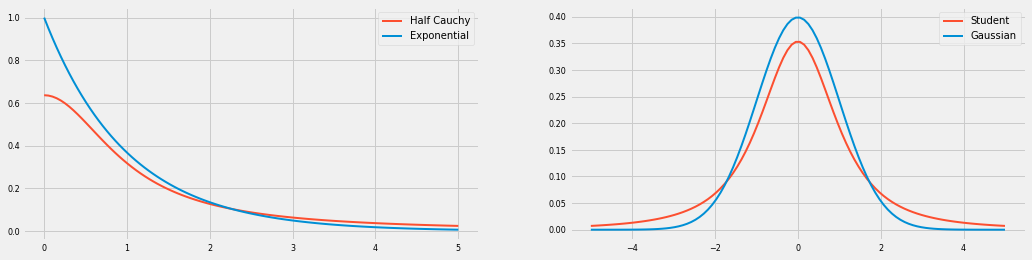

In [26]:
fig = plt.figure(figsize=(16, 4))
dist = stats.halfcauchy()
ax = fig.add_subplot(121)
x_ = np.linspace(0,5, 100)
ax.plot(x_, dist.pdf(x_), color=colors[1], label='Half Cauchy')
ax.plot(x_, stats.expon.pdf(x_), label='Exponential')
plt.legend()
ax = fig.add_subplot(122)
dist1 = stats.t(2)
x_ = np.linspace(-5,5, 100)
ax.plot(x_, dist1.pdf(x_), color=colors[1], label='Student')
ax.plot(x_, stats.norm.pdf(x_),label='Gaussian')
plt.legend()
plt.show()

In [ ]:
with pm.Model() as model_1:
    # a priori
    sigma = pm.HalfCauchy('sigma', beta=1)
    theta_0 = pm.Normal('theta_0', mu=0, sd=20)
    theta_1 = pm.Normal('theta_1', mu=0, sd=20)
    # likelihood
    likelihood = pm.StudentT('y', mu=theta_0+theta_1*x, sd=sigma, nu=1.0, observed=y)
    trace_1 = pm.sample(3000)

<Figure size 1152x576 with 0 Axes>

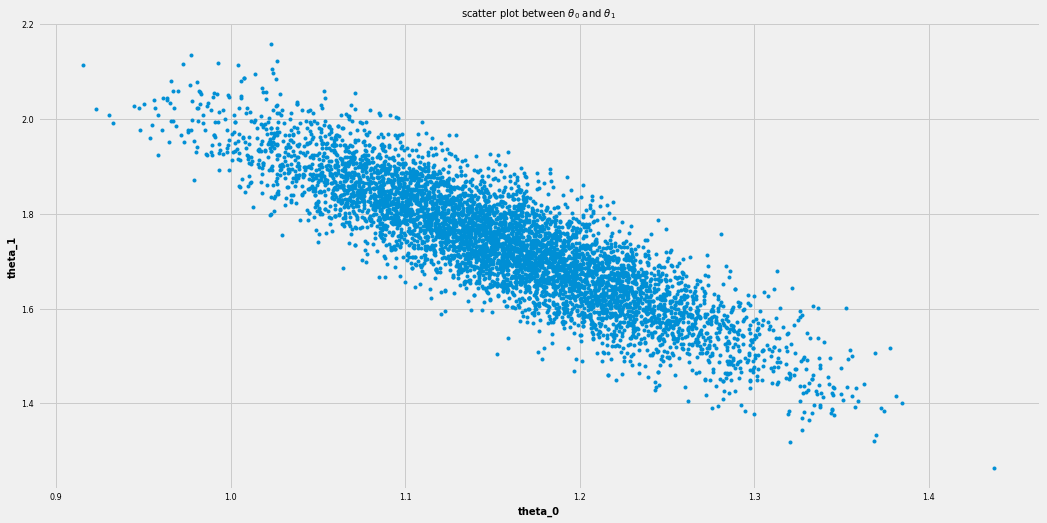

In [30]:
plt.figure(figsize=(16,8))
pm.pairplot(trace,
           var_names=['theta_0','theta_1'],
           divergences=True)
plt.title(r'scatter plot between $\theta_0$ and $\theta_1$')
plt.show()

<Figure size 1152x576 with 0 Axes>

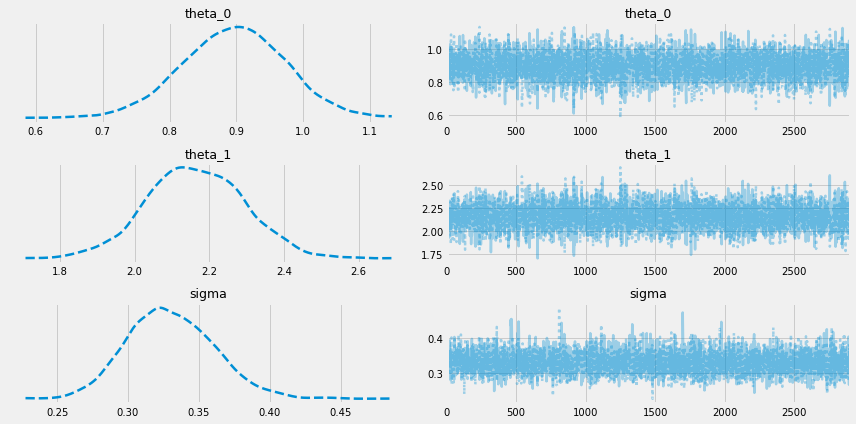

In [31]:
plt.figure(figsize=(16,8))
pm.traceplot(trace_1[100:], lines={'theta_0':true_intercept, 'theta_1':true_slope}, combined=True)
plt.tight_layout()
plt.show()

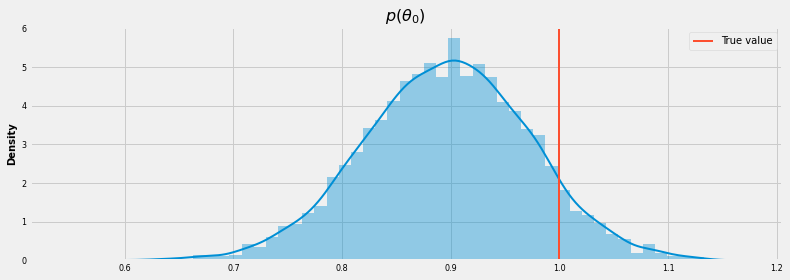

In [32]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace_1['theta_0'], color=colors[0])
ax.axvline(true_intercept, color=colors[1], label='True value')
plt.title(r'$p(\theta_0)$', fontsize=16)
plt.legend()
plt.show()

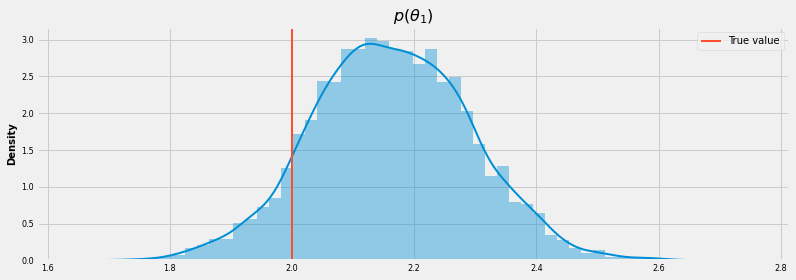

In [33]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace_1['theta_1'], color=colors[0])
ax.axvline(true_slope, color=colors[1], label='True value')
plt.title(r'$p(\theta_1)$', fontsize=16)
plt.legend()
plt.show()

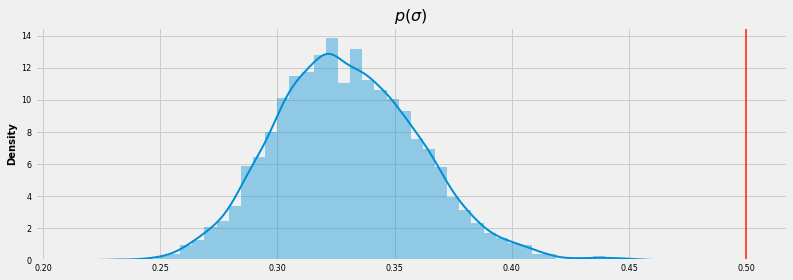

In [35]:
fig = plt.figure(figsize=(12,4))
ax = sns.distplot(trace_1['sigma'], color=colors[0])
ax.axvline(true_var, color=colors[1], label='True value')
plt.title(r'$p(\sigma)$', fontsize=16)
plt.show()

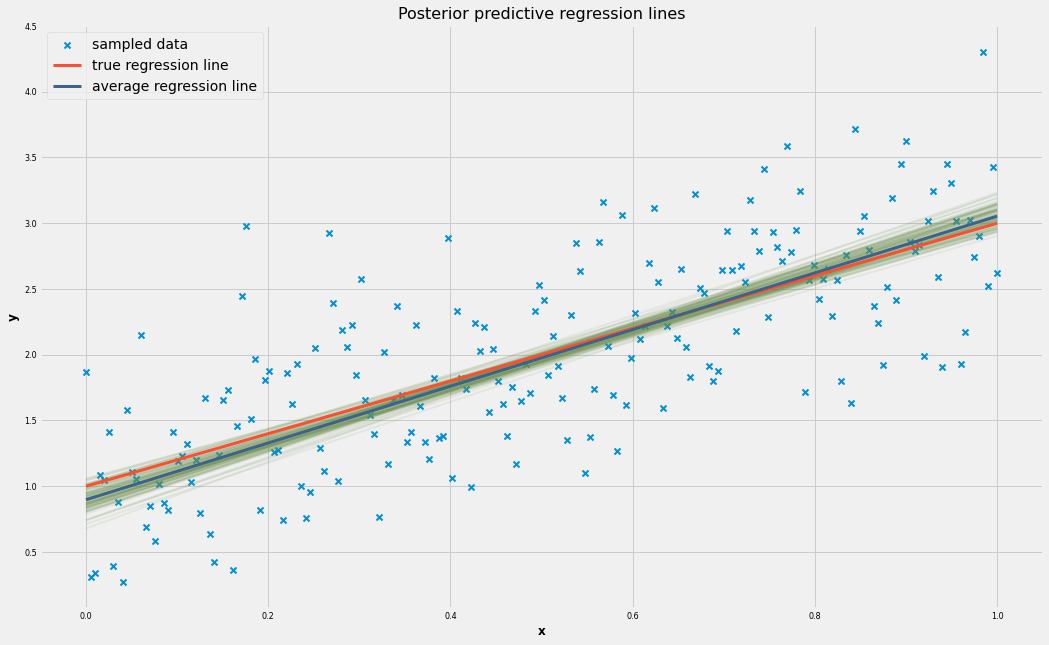

In [36]:
plt.figure(figsize=(16, 10))
plt.scatter(x, y, marker='x', color=colors[0],label='sampled data')
t0 = []
t1 = []
for i in range(100):
    ndx = np.random.randint(0, len(trace_1))
    theta_0, theta_1 = trace_1[ndx]['theta_0'], trace_1[ndx]['theta_1']
    t0.append(theta_0)
    t1.append(theta_1)
    p = theta_0+theta_1*x 
    plt.plot(x, p, c=colors[3], alpha=.1)
plt.plot(x, true_regression_line, color=colors[1], label='true regression line', lw=3.)
theta_0_mean = np.array(t0).mean()
theta_1_mean = np.array(t1).mean()
plt.plot(x, theta_0_mean+theta_1_mean*x, color=colors[8], label='average regression line', lw=3.)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Posterior predictive regression lines', fontsize=16)
plt.legend(loc=0, fontsize=14)
plt.show()

In [42]:
p = theta_0_mean+theta_1_mean*x

In [51]:
e = [(y[i]-p[i])**2 for i in range(len(p))]
err = np.mean(e)
print(err)

0.2616048701105964
